<a href="https://colab.research.google.com/github/VitalyEn/1358343-cat-energy-21/blob/master/%D0%B1%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D0%B8%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D1%8B_%D0%A2%D0%90%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Control Systems Library
ссылка на [документацию](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/4_First_and_second_order_system_dynamics/First%20order%20systems.html)

In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 9.5 MB/s eta 0:00:00


# Полезные примеры визуализации

/tmp/ipython-input-4163778294.py:10: RuntimeWarning: invalid value encountered in sqrt
  formatter = FuncFormatter(lambda x, pos: '{:0.2f}'.format(np.sqrt(x+1)))


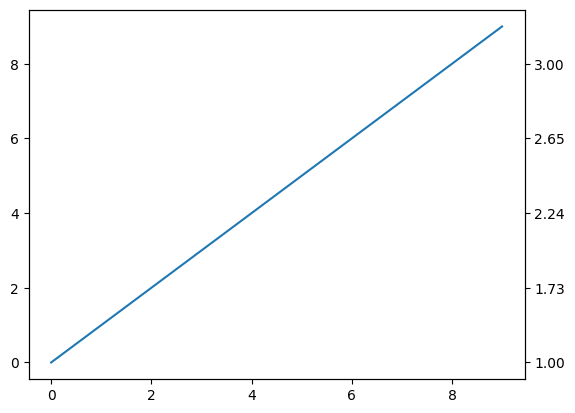

In [2]:
# тестируем отображение на одной спектрограмме двух осей
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax1 = plt.subplots()
ax1.plot(range(10))

ax2 = ax1.twinx()
formatter = FuncFormatter(lambda x, pos: '{:0.2f}'.format(np.sqrt(x+1)))
ax2.yaxis.set_major_formatter(formatter)

ax2.set_ylim(ax1.get_ylim())

plt.show()

# Модель систем - дифференциальное уравнение

In [3]:
!pip install sympy

Обыкновенное линейное дифференциальное уравнение второго порядка:

\\begin{cases}
 & T^2 \frac{\mathrm{d^{2} y} }{\mathrm{d} t^{2}}  + 2*T \zeta \frac{\mathrm{d y} }{\mathrm{d} t}  + y(t) = Ku(t)
\end{cases}

In [4]:
import sympy
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols

# Определяем переменные
t = sympy.symbols('t', positive = True, real = True)
y = sympy.Function('y', positive = True, real = True)
T = sympy.symbols('T', positive = True, real = True)
K = sympy.symbols('K', positive = True, real = True)
zeta = sympy.symbols('zeta', positive = True, real = True)

In [5]:
# Определяем уравнение
equation = sympy.Eq(y(t).diff(t,t), K / T**2 * cos(0.6*t) - 2/T * zeta * y(t).diff(t) - 1/T**2 * y(t) )

# Решаем уравнение
solution = sympy.dsolve(equation, y(t), ics = {y(0): 0, y(t).diff(t).subs(t, 0): 0})

print(solution)

Eq(y(t), -225.0*K*T**2*cos(0.6*t)/(81.0*T**4 + 900.0*T**2*zeta**2 - 450.0*T**2 + 625.0) + 750.0*K*T*zeta*sin(0.6*t)/(81.0*T**4 + 900.0*T**2*zeta**2 - 450.0*T**2 + 625.0) + 625.0*K*cos(0.6*t)/(81.0*T**4 + 900.0*T**2*zeta**2 - 450.0*T**2 + 625.0) + (-225.0*K*T**2*zeta/(162.0*T**4*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5 + 1800.0*T**2*zeta**2*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5 - 900.0*T**2*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5 + 1250.0*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5) + 225.0*K*T**2*sqrt(zeta - 1.0)*sqrt(zeta + 1.0)/(162.0*T**4*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5 + 1800.0*T**2*zeta**2*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5 - 900.0*T**2*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5 + 1250.0*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5) - 625.0*K*zeta/(162.0*T**4*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5 + 1800.0*T**2*zeta**2*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5 - 900.0*T**2*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5 + 1250.0*(zeta - 1.0)**0.5*(zeta + 1.0)**0.5) - 625.0*K*sqrt(zeta - 1.0)*sqrt(zeta + 1.0)/(162.0*T**4*(zeta - 1.

In [6]:
h = solution.subs({K: 1, T: 2, zeta: 0.1})
print(h)

Eq(y(t), (0.875796178343949 + 0.48811549944914*I)*exp(0.5*t*(-0.1 + 0.99498743710662*I)) + 0.955414012738854*sin(0.6*t) - 1.7515923566879*cos(0.6*t) + (0.875796178343949 - 0.48811549944914*I)*exp(-0.5*t*(0.1 + 0.99498743710662*I)))


In [7]:
sympy.simplify(h)

Eq(y(t), ((0.955414012738854*sin(0.6*t) - 1.7515923566879*cos(0.6*t))*exp(0.1*t) + (0.875796178343949 - 0.48811549944914*I)*exp(0.5*t*(0.1 - 0.99498743710662*I)) + (0.875796178343949 + 0.48811549944914*I)*exp(0.5*t*(0.1 + 0.99498743710662*I)))*exp(-0.1*t))

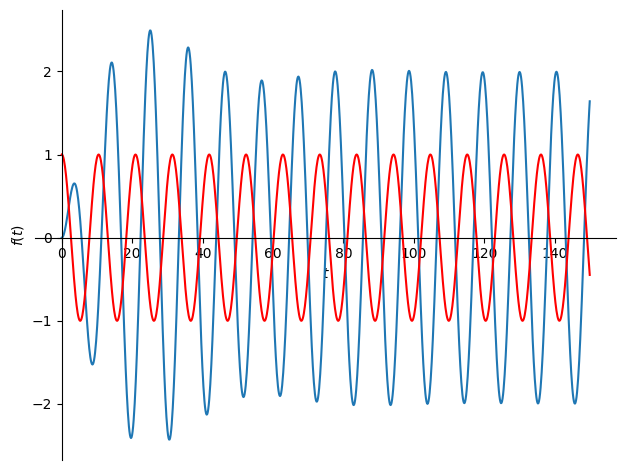

In [8]:
p = sympy.plot(h.rhs, cos(0.6*t), (t,0,150), show = False)
p[1].line_color = 'red'
p[1].line_stype = ':'
p.show()

# Частотная характеристика и преобразование Фурье

In [9]:
import sympy

In [10]:
i2pi = sympy.I*2*sympy.pi
exp = sympy.exp
def S(N):
    return sum(c(n)*exp(i2pi*n*t/P) for n in range(-N, N+1)).expand(complex=True).simplify()

def c(n):
    return (sympy.integrate(
               f(t)*exp((-i2pi * n * t)/P),
               (t, t0, t0 + P))/P)
def f(t):
    return t

In [11]:
P = 20
t0 = -10
N = 7

In [12]:
t = sympy.Symbol('t', real=True)

In [13]:
analytic_approx = S(N).expand()
analytic_approx

20*sin(pi*t/10)/pi - 10*sin(pi*t/5)/pi + 20*sin(3*pi*t/10)/(3*pi) - 5*sin(2*pi*t/5)/pi + 4*sin(pi*t/2)/pi - 10*sin(3*pi*t/5)/(3*pi) + 20*sin(7*pi*t/10)/(7*pi)

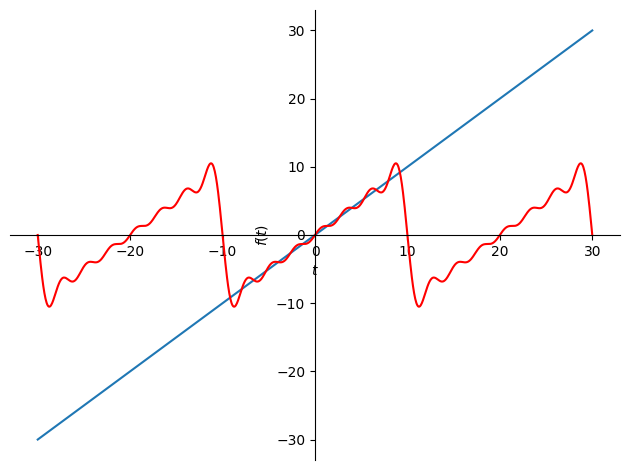

In [14]:
interval = (t, t0-P, t0+2*P)
p1 = sympy.plot(f(t), interval, show=False)
p2 = sympy.plot(analytic_approx, interval, show=False)
p2[0].line_color = 'red'
p1.extend(p2)
p1.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# гармонический детерминированный сигнал
# число точек в выборке
N = 300
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0 #5 секунд
t = np.linspace(0.0, T, N)

y = 1 * np.sin(1.0 * 2.0*np.pi*t) + 2 * np.sin(12.0 * 2.0*np.pi*t) + 0.5*np.sin(3.0 * 2.0*np.pi*t)
#y = np.cos(1.0 * 2.0*np.pi*t) + t

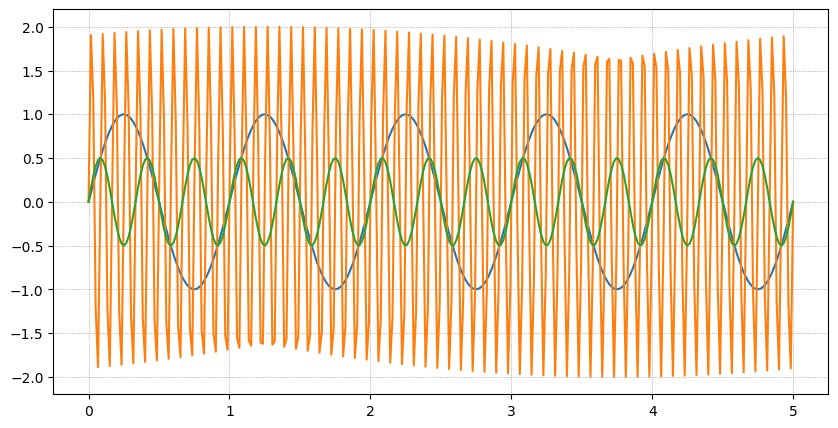

In [17]:
# Визуализация трех гармонических сигналов
plt.figure(figsize=(10, 5))
plt.plot(t, np.sin(1.0 * 2.0*np.pi*t), t, 2*np.sin(12.0 * 2.0*np.pi*t), t, 0.5*np.sin(3.0 * 2.0*np.pi*t))
#plt.plot(t, y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

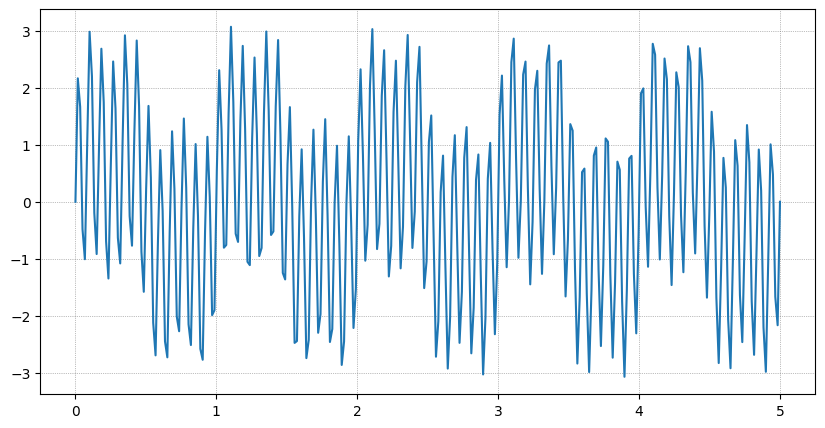

In [18]:
# Визуализация трех гармонических сигналов
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

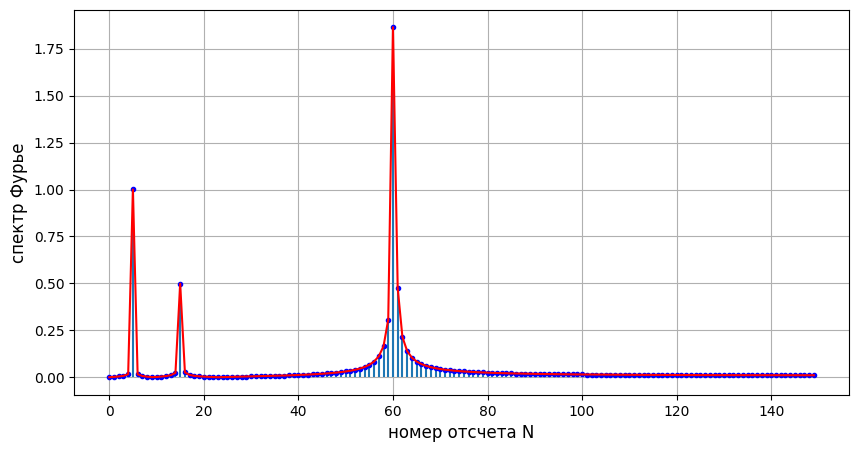

In [19]:
from scipy.fft import fft, fftfreq

yf = fft(y)[:N//2]
# берем половину спектра - всего N значений
# половину берем потому, что спект симметричный относительно оси y
plt.figure(figsize=(10, 5))
plt.xlabel('номер отсчета N', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
plt.grid()
plt.stem(abs(yf)/N*2, markerfmt = 'b.', basefmt=" ")
plt.plot(abs(yf)/N*2, color = 'red')
plt.show()
# спектр отнормализуем на величину N и умножим на 2
# так как половину c отрицательной оси мы откинули

Спектрограмма построена относительно отсчетов. Всего отсчетов N.

Индекс отсчета i.
Итого преобразование Фурье зависит от f_i = i / N * k

x_{fft}[k] = \displaystyle\sum_{i=0}^{N-1} exp^{ - 2\pi j \frac{i} {N} k} x[k]

Итого: 2π/N - это параметр нормализации частоты


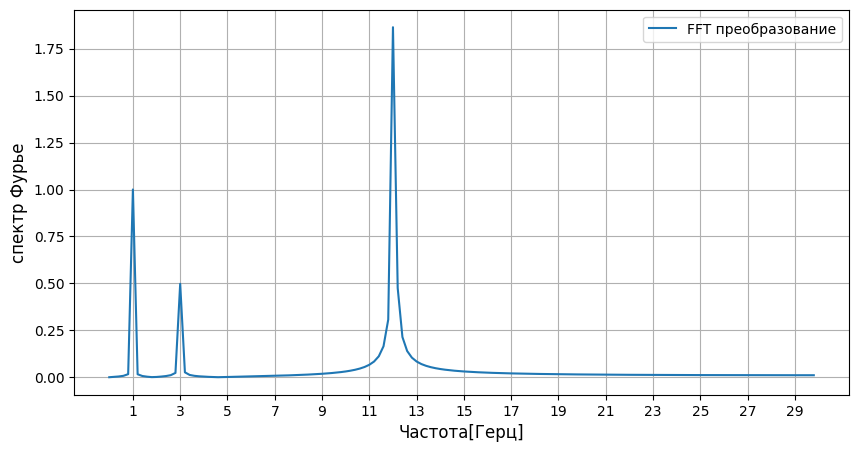

In [20]:
# перейдем от отсчетов N к частотам
xf = fftfreq(N, T/N)[:N//2]
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть
plt.figure(figsize=(10, 5))
plt.plot(xf, np.abs(yf[0:N//2])/N*2,label='FFT преобразование')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
plt.xticks(np.arange(1, np.max(xf), 2))
plt.grid()
plt.legend()
plt.show()

вот так выглядит "скаллограмма"
сигнал у(t) содержит N точек
"Частота Найквиста" = 1/N



In [21]:
print(' Число точек в сигнале =',len(y),
      '\n Длительность времени сигнала =',T,'секунд'
      '\n Частота Найквиста', 1/len(y)*2,
      '\n Частота дискретизации',1/T,
      '\n Samling rate',T/N)

 Число точек в сигнале = 300 
 Длительность времени сигнала = 5.0 секунд
 Частота Найквиста 0.006666666666666667 
 Частота дискретизации 0.2 
 Samling rate 0.016666666666666666


5 значимых частот [12.   1.   3.  12.2 11.8]
амплитуды гармоник на 5 значимых частотах [279.66858991 150.01008023  74.64655774  71.26983203  46.02755065]


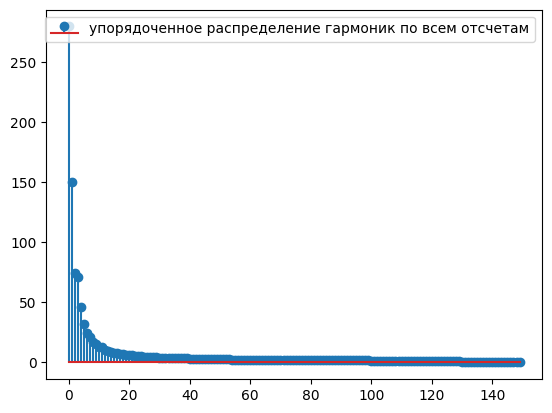

In [22]:
#сортируем массив y и получаем индексы в возрастающем порядке
sort_yf_indices = abs(yf).argsort()

#получаем 5 элементов с самыми высосикими гармониками
#так как сортировка по возрастанию, то они в конце списка
#с помощью индекса [::-1] выводим массив в обратном порядке
print('5 значимых частот',xf[sort_yf_indices[-5::]][::-1])
print('амплитуды гармоник на 5 значимых частотах', abs(yf)[sort_yf_indices[-5::]][::-1])
yf_sort = yf[sort_yf_indices[-5::]][::-1]/N*2
xf_sort = xf[sort_yf_indices[-5::]][::-1]
plt.stem(abs(yf[sort_yf_indices[::-1]]), label='упорядоченное распределение гармоник по всем отсчетам')
plt.legend()

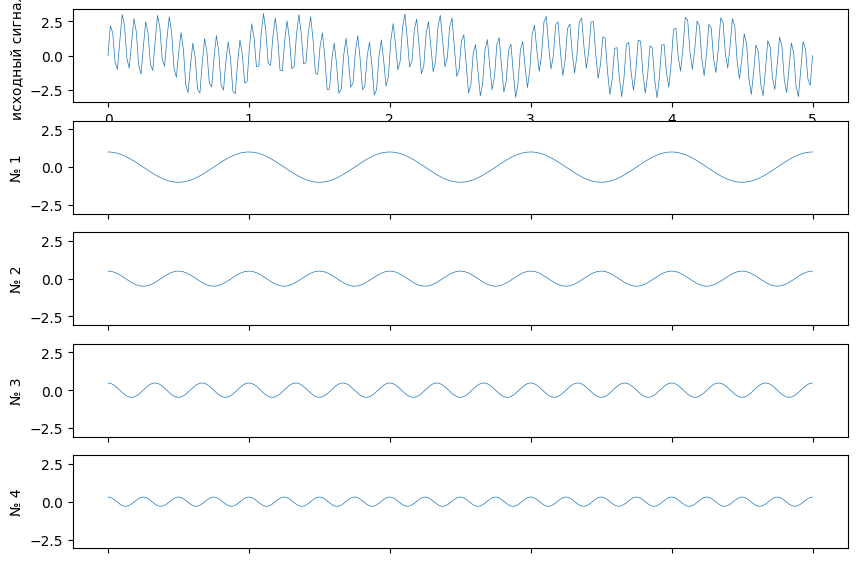

In [23]:
plot_number = 4+1
fig, ax = plt.subplots(plot_number,1,figsize=(10,7))
ax[0].plot(t, y,linewidth = 0.5)
ax[0].set_ylabel('исходный сигнал', rotation = 90)

for i in range(1,plot_number):
    ax[i].set_ylim(np.min(y), np.max(y))
    ax[i].set_xticklabels([])
    ax[i].set_ylabel('№ %i' %i, rotation = 90)
    ax[i].plot(t, abs(yf_sort[i])*np.cos(2*np.pi*t*i),linewidth = 0.5)

In [24]:
!pip install spectrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 kB 18.5 MB/s eta 0:00:00
  Created wheel for spectrum: filename=spectrum-0.9.0-cp312-cp312-linux_x86_64.whl size=236768 sha256=736f1d2342d1f2269f484b74333a8b9d4171c7626d78f400fdfe78a0d18509c8
  Stored in directory: /root/.cache/pip/wheels/19/a0/e0/e04656d89dd723adbe6ea41ab5fe702f5d4ccf95653eb54b04
Successfully built spectrum


входной сигнал:
y = np.sin(1.0 * 2.0*np.pi*t) = sin(ωt) = sin(2*π*f t)

частота f = 1.0 Гц
круговая частота f * 2 * π рад/сек!

 f = 1/T

 ω = 2*pi/T

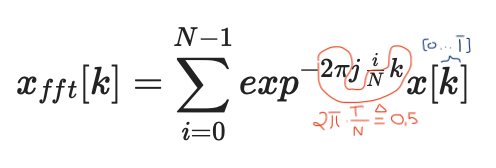

In [25]:
import spectrum

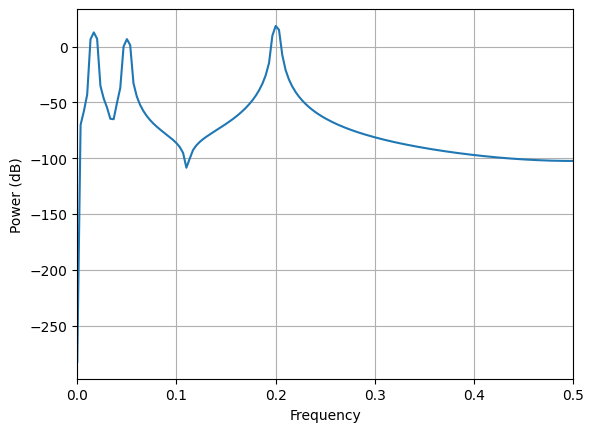

In [26]:
#строим спект из библиотеки
#почему по оси частот видим 0.5 частоту?
p = spectrum.Periodogram(y)
p.plot()

на периодиограмме частота 0.5 и многие думают, что это 0.5 Гц - это не так.
Дело в том, что используется нормализованная частата для периодиограммы!

Нормализованная частота Ω = ω/sampling_rate

sampling_rate - это число отчетов за перидод времени.
У нас N отчетов за Т времени.
Итого: sampling_rate = T/N

# Передаточная функция и преобразование Лапласа

In [27]:
import sympy

In [28]:
t, s = sympy.symbols('t, s')
T = sympy.symbols('T', real=True, positive=True)
K = sympy.symbols('K', real=True, positive=True)
zeta = sympy.symbols('zeta', real=True, positive=True)

W = K/((T**2*s**2 + 2*zeta*T*s + 1))

In [29]:
W

K/(T**2*s**2 + 2*T*s*zeta + 1)

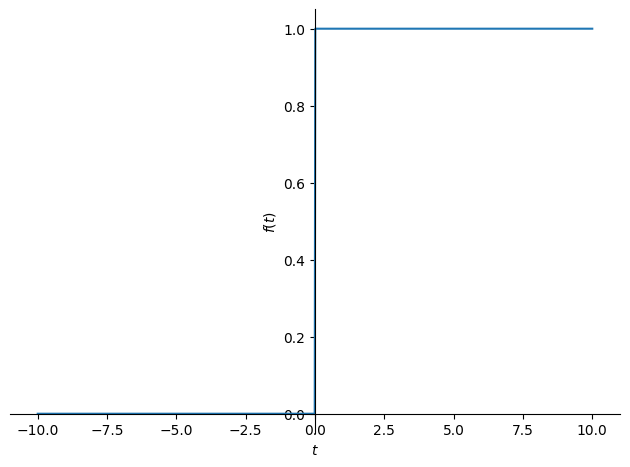

In [30]:
#пример ступенчатой функции
sympy.Heaviside(t)
sympy.plot(sympy.Heaviside(t))

In [31]:
# определяем функцию прямого и обратного преобразования Лапласа
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [32]:
invL(W)

K*exp(-t*zeta/T)*sin(t*sqrt(1 - zeta**2)/T)*Heaviside(t)/(T*sqrt(1 - zeta**2))

In [33]:
h = invL(W).subs({K: 1, T: 2, zeta: 0.1})
print(h)

0.502518907629606*exp(-0.05*t)*sin(0.49749371855331*t)*Heaviside(t)


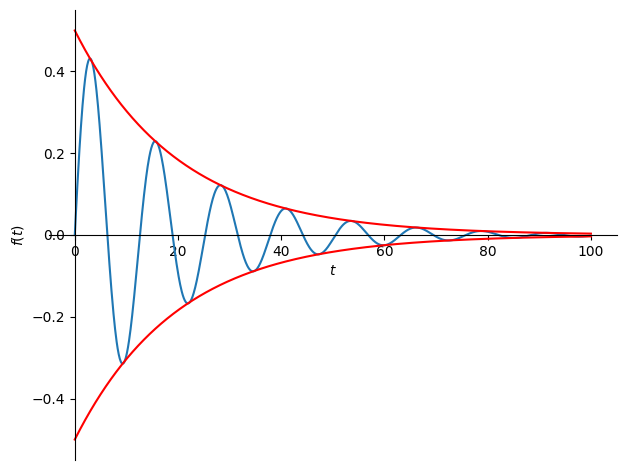

In [34]:
from sympy import*
p = sympy.plot(h,0.5*exp(-0.05*t),-0.5*exp(-0.05*t),(t,0,100), show = False)
p[1].line_color = 'red'
p[2].line_color = 'red'
p.show()

In [35]:
from sympy import*
#var('s a b')
var('t', positive = True)

y1 = sin(3*t)
#y2 = exp(-7*t)
y2 = 1
# Прямое преобразование a*L{y1(t)}:
L1 = 5 * laplace_transform(y1, t, s, noconds = True)
# Прямое преобразование b*L{y2(t)}:
L2 = 3 * laplace_transform(y2, t, s, noconds = True)
# Сумма a*L{f(t)}+b*L{q(t)}:

L = factor(L1 * L2)
print (L)

45/(s*(s**2 + 9))


5 - 5*cos(3*t)


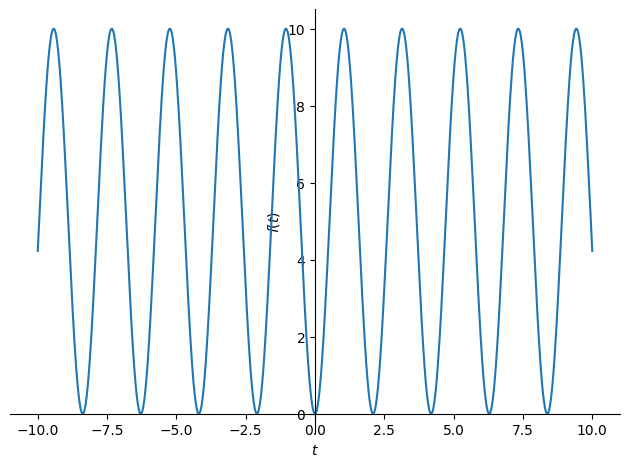

In [36]:
from sympy import*

h = inverse_laplace_transform(L, s, t)
print(h)
sympy.plot(h)

-5*cos(3*t)*Heaviside(t) + 5*Heaviside(t)


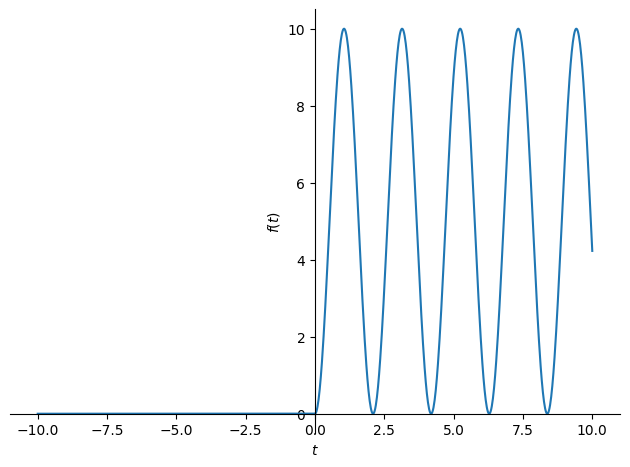

In [37]:
from sympy import*

s = symbols('s')
t = symbols('t', real = True)
T = symbols('T', positive = True)
K = symbols('K', positive = True)
h = inverse_laplace_transform(L, s, t)
print(h)
sympy.plot(h)

In [38]:
from sympy import *
s = symbols('s', complex=True, real=False)
t = symbols('t', real = True)
ksi = symbols('ksi', positive = True)
T = symbols('T', positive = True)
K = symbols('K', positive = True)

F = simplify((K * s**2)/(T * s**2 + 2*ksi*T*s + 1))
print(F)
t = symbols('t', real = True)
exp = inverse_laplace_transform(F, s, t)
print(exp)

K*s**2/(2*T*ksi*s + T*s**2 + 1)
K*((sqrt(T)*(2*ksi**2/T - 1/T**2)*exp(-ksi*t)*sin(t*sqrt(-T*ksi**2 + 1)/sqrt(T))/sqrt(-T*ksi**2 + 1) - 2*ksi*exp(-ksi*t)*cos(t*sqrt(-T*ksi**2 + 1)/sqrt(T))/T)*Heaviside(t) + DiracDelta(t)/T)


In [39]:
from sympy import *
F = 1 * s**2/(2 * s**2 + 2*0.1*3*s + 1)
print(F)
exp = inverse_laplace_transform(F, s, t)
print(exp)

s**2/(2*s**2 + 0.6*s + 1)
(-0.329226445408052*exp(-0.15*t)*sin(0.691013748054263*t) - 0.15*exp(-0.15*t)*cos(0.691013748054263*t))*Heaviside(t) + 0.5*DiracDelta(t)


In [40]:
from sympy import *
F = apart(F)
print(F)
exp = inverse_laplace_transform(F, s, t)
print((exp))

-0.25*(0.6*s + 1.0)/(1.0*s**2 + 0.3*s + 0.5) + 0.5
-0.25*(1.31690578163221*exp(-0.15*t)*sin(0.691013748054263*t) + 0.6*exp(-0.15*t)*cos(0.691013748054263*t))*Heaviside(t) + 0.5*DiracDelta(t)


In [41]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

In [42]:
round_expr(exp,2)

-0.25*(1.32*exp(-0.15*t)*sin(0.69*t) + 0.6*exp(-0.15*t)*cos(0.69*t))*Heaviside(t, 0.5) + 0.5*DiracDelta(t)

# Типовые передаточные функции

In [43]:
!pip install control

In [44]:
import control
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#передаточная функция: числитель и знаменатель
#колебательное звено
K = 1
T = 2
zeta = 0.1
num = np.array([K])
den = np.array([T**2, 2*T*zeta, 1])
W = control.tf(num, den)
print('W(s) = ', W)

W(s) =  <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          1
  -----------------
  4 s^2 + 0.4 s + 1


/usr/local/lib/python3.12/dist-packages/control/lti.py:646: FutureWarning: freqresp() is deprecated; use frequency_response()
  warn("freqresp() is deprecated; use frequency_response()", FutureWarning)


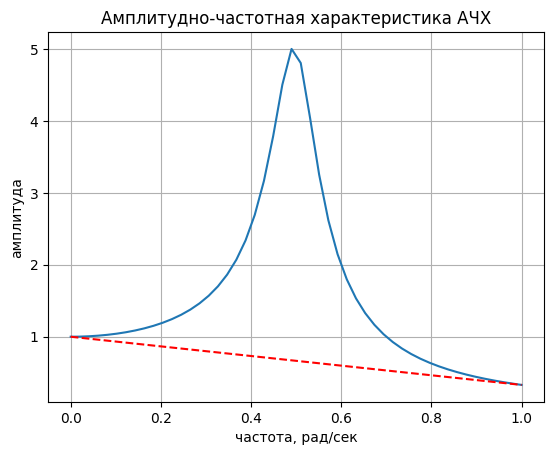

In [46]:
mag, phase, omega = control.freqresp(W,np.linspace(0,1))
plt.plot(omega, mag)
plt.title("Амплитудно-частотная характеристика АЧХ")
plt.xlabel("частота, рад/сек")
plt.ylabel("амплитуда")
plt.grid()
plt.plot([omega[0],omega[-1]],[mag[0],mag[-1]],'r--')

TypeError: iter() returned non-iterator of type 'numpy.ndarray'

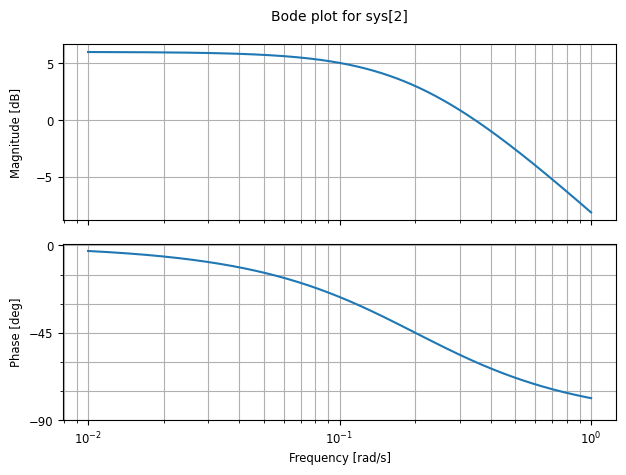

In [47]:
K = 2
T = 5
tf_aperiod = control.tf(K, [T, 1])
# построение асимптот для ЛАХ
fig = plt.figure()
mag, phase, omega = control.bode_plot(tf_aperiod, dB = True, Hz = False)

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # построение асимптот амплитуды
plt.plot([1/T, 1/T], plt.ylim(),'r--')
plt.plot(plt.xlim(),[20*np.log10(2), 20*np.log10(2)],'--', color = 'orange')
plt.plot((omega), +20*np.log10(K) - 20*np.log10(T) - 20*np.log10(omega), '--', color = 'orange')

plt.sca(ax2)                 # построение асимптоты фазы
plt.plot(plt.xlim(),[-90,-90],'r--')
plt.plot([1/T, 1/T], plt.ylim(),'r--')

In [ ]:
#изображение логарифмической частотной характеристики = ЛАХ
fig = plt.figure()
mag, phase, omega = control.bode_plot(W, dB = True, Hz = False)

In [ ]:
# строим ЛАХ и определяем точку пересечения на уровне -180
mag,phase,omega = control.bode(W, np.logspace(-1,2));

# определяем точку пересечения на заданной частоте
wc = np.interp(-180.0*np.pi/180,np.flipud(phase),np.flipud(omega))
# определяем значение амплитуды на выбранной частоте
wc = 1/T
Kcu = np.interp(wc,omega,mag)

print('Частота = ', wc, ' Гц')
print('Амплитуда = ', Kcu)

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[Kcu,Kcu],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Амплитуда / Gain at Crossover = {0:.3g}".format(Kcu))

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')

In [ ]:
#колебательное звено
fig = plt.figure(figsize=(15,8))

#смотрим набор функций
for x in range(0,10):
  K = 1
  T = 2
  zeta = 0.1*x
  num = np.array([K])
  den = np.array([T**2, 2*T*zeta, 1])
  W = control.tf(num, den)
  control.bode_plot(W, dB = True, Hz = False)

In [ ]:
#изображение АФЧХ - амплитудно-фазо частотная характеристика
control.nyquist_plot(W)

# ABCD представление системы


In [ ]:
pip freeze

In [ ]:
import control
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
T = 2
zeta = 0.1

In [ ]:
W = control.tf([1],[T**2, 2*T*zeta, 1]) * control.tf([1],[T, 1])
t, y = control.step_response(W)
plt.plot(t, y)
plt.grid()
plt.show()

In [ ]:
W

In [ ]:
t = np.arange(0, 100, 0.5)
u = np.sin(1/2*np.pi*t)

In [ ]:
t, y = control.forced_response(W, t, u)
plt.figure(figsize=(15,5))
plt.plot(t, y, label='y_0')
plt.plot(t,u, 'r')

In [ ]:
x_omega = np.arange(0,5,0.1)
mag, phase, omega = control.freqresp(W, x_omega)
plt.plot(omega,mag)
plt.xlabel('частота')
plt.ylabel('амплитуда')
plt.grid()
plt.show()

In [ ]:
plt.plot(omega,mag)
plt.plot([1/T, 1/T], plt.ylim(),'r--')

In [ ]:
import control.matlab as ctl # библиотека для построения графиков

In [ ]:
sysABCD = control.tf2ss(W)
print(sysABCD.A)
print(sysABCD.B)
print(sysABCD.C)

In [ ]:
plt.figure()
ctl.bode(sysABCD)

ax1, ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot([1/T, 1/T], plt.ylim(),'r--')

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180,-180],'r--')

plt.show()

In [ ]:
Gc_o, T = control.observable_form(sysABCD)

In [ ]:
Gc_o

In [ ]:
Gc_r, T = control.reachable_form(sysABCD)

In [ ]:
Gc_r

In [ ]:
# определяем ABCD-матрицу системы (пример системы)
A = np.array([[-0.5, -1], [1, 0]]) # матрица A
B = np.array([[1, 0], [0, 1]]) # матрица B
C = np.array([[0, 1], [0, 0]]) # матрица C
D = np.zeros((2, 2)) # матрица D

# решаем задачу с ненаблюдаемой системой
A_n = np.array([[-0.5, -1], [1, 0]])
B_n = np.array([[0, 0], [0, 0]])
C_n = np.array([[1, 0]])
D_n = np.zeros((1, 2))

# Создаем объект состояний sys на основе переданных ей матриц системы A, B, C и D.
# Используется для описания линейной системы в пространстве состояний и
# дальнейшего анализа системы на управляемость и наблюдаемость
sys = ctl.ss(A, B, C, D)
#sys = control.ss(A_n, B_n, C_n, D_n)

In [ ]:
control.poles(sys)

In [ ]:
sys

In [ ]:
# проверяем управляемость системы
# Создаем матрицу управляемости системы.
control_matrix = control.ctrb(sys.A, sys.B)

# Вычисляем ранг матрицы управляемости np.linalg.matrix_rank(control_matrix).
# Ранг матрицы управляемости определяет количество независимых столбцов в матрице,
# которые могут быть управляемыми через входные переменные.

uncontrollable_states = sys.A.shape[0] - np.linalg.matrix_rank(control_matrix)

if uncontrollable_states == 0:
    print("Система управляема")
else:
    print(f"Система неуправляема, {uncontrollable_states} состояний неуправляемы")

# проверяем наблюдаемость системы
# Матрица наблюдаемости вычисляется с помощью функции ctl.obsv(sys.A, sys.C).
observation_matrix = control.obsv(sys.A, sys.C)

unobservable_states = sys.A.shape[0] - np.linalg.matrix_rank(observation_matrix)

if unobservable_states == 0:
    print("Система наблюдаема")
else:
    print(f"Система ненаблюдаема, {unobservable_states} состояний неравновесны")

In [ ]:
from control.matlab import rss, lsim

In [ ]:
# строим реакцию на ступенчатое воздействие

T = np.linspace(0, 10, 100)
U = np.ones((len(T), 2))
# Функция lsim из библиотеки control используется для численного решения дифференциального уравнения,
# описывающего динамику системы, заданной матрицами A, B, C и D.
Y, T, _ = ctl.lsim(sys, U, T)

# строим график реакции на ступенчатое воздействие
plt.plot(T, Y[:, 0], label="Выход 1")
#plt.plot(T, Y[:, 1], label="Выход 2")
plt.legend()
plt.show()

# Устойчивость

In [ ]:
import control
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy import *
s = Symbol('s')
Ksym = Symbol('Ksym')

In [ ]:
def routhHurwitz(Ts,*args):
    den = sympy.poly(Ts.as_numer_denom()[1],s).all_coeffs()
    n = len(den)-1
    if n < 2:
        return None
    m = sympy.zeros(n+1, n+1) # Corrected from matrices.zeros
    # Insert the first two rows
    c = [den[i] for i in range(0,n+1,2)]
    for i in range(0,len(c)):
        m[0,i] = c[i]
    c = [den[i] for i in range(1,n+1,2)]
    for i in range(0,len(c)):
        m[1,i] = c[i]

    # Compute the rest of the entries
    for i in range(2,n+1):
        for j in range(1,n):
            if m[i-1,j] == 0:
                m[i,j-1] = m[i-2,j]
            elif m[i-1,0] !=0:
                m[i,j-1] = ((m[i-1,0]*m[i-2,j]-m[i-2,0]*m[i-1,j])/m[i-1,0]).together().simplify()


    m = m.col_insert(0, sympy.Matrix(([s**(n-i) for i in range(0,n+1)])))
    return m

In [ ]:
Wsym = 1 / (s**2 + s + Ksym)
Wsym

In [ ]:
routhHurwitz(Wsym)

In [ ]:
import numpy as np
import sys

def create_hurwitz_matrix(coefficients):
    k = 0
    matrix = []
    for _ in range(0, len(coefficients)-1):
        column = []
        for d in range(0, len(coefficients)-1):
            if 2*d+1-k < 0:
                column.append(0)
            else:
                try:
                    column.append(coefficients[2*d+1-k])
                except IndexError:
                    column.append(0)
            d += 1
        matrix.append(column)
        k += 1
    return np.array(matrix)

#def check_matrix_determinant(matrix):
#   check if the matrix denominator renders the system unstable or marginally
#   stable

def create_minor(matrix, row, column):
    # removes the i-th row and the j-th column
    return matrix[
        np.array(list(range(row)) +
                 list(range(row+1, matrix.shape[0])))[:,np.newaxis],
        np.array(list(range(column)) +
                 list(range(column+1, matrix.shape[1])))]

def check_stability(hurwitz_matrix, coefficients):
    print(hurwitz_matrix)
    print("Determinant of this matrix is equal: "+
          str(np.linalg.det(hurwitz_matrix)))
    if np.linalg.det(hurwitz_matrix) > 0:
        print("Determinant of the hurwitz matrix is greater than zero")
    elif np.linalg.det(hurwitz_matrix) == 0:
        print("System is marginally stable")
    else:
        return("System is unstable")

    for _ in range(0, len(coefficients)-2):
        x,y = hurwitz_matrix.shape
        hurwitz_matrix= create_minor(hurwitz_matrix, x-1, y-1)
        print(hurwitz_matrix)
        print("Determinant of this matrix is equal: " +
              str(np.linalg.det(hurwitz_matrix)))
        if np.linalg.det(hurwitz_matrix) > 0:
            continue
        elif np.linalg.det(hurwitz_matrix) == 0:
            print("System is marginally stable")
            continue
        else:
            return("System is unstable")
    return("System is stable")

print("If the polynomial of the denominator of the system's characteristic "
      "equation (transfer function is given as: ")
print("a0*s^n + a1*s^(n-1) + ... + a(n-1)*s + an")
print("Enter the degree of the denominator polynomial")
degree = int(input('Degree: '))
coefficients = []
for x in range (0, degree+1):
    coefficient = int(input(str('Enter coefficient '+ 'a' + str(x) + ": ")))
    coefficients.append(int(coefficient))
print(coefficients)
print("To be stable, all of the system's denominator polynomial coefficients "
      "must be greater than zero")
matrix=create_hurwitz_matrix(coefficients)

print('Hurwitz Matrix: \n')
newmatrix=matrix
print(check_stability(newmatrix, coefficients))

## Частотные методы оценки устойчивости по ЛАХ

In [ ]:
K = 0.5
T = 2.0
zeta = 0.1

In [ ]:
Wfeedback = control.feedback(control.tf([K],[T**2, 2*T*zeta, 1]), control.tf([1],[T, 1]), sign = -1)

In [ ]:
W = control.tf([K],[T**2, 2*T*zeta, 1]) * control.tf([1],[T, 1])
t, y = control.step_response(Wfeedback)
plt.plot(t, y)
plt.grid()
plt.show()

In [ ]:
W

In [ ]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (11,5)
#w = np.logspace(-1,0,200)
mag, phase, omega = control.bode(W, dB=True, wrap_phase=False, plot=True)

wL0 = np.interp(1, np.flipud(mag), np.flipud(omega))

print(wL0)


ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot([wL0, wL0], plt.ylim(),'r--')

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wL0, wL0], plt.ylim(),'r--')


## Устойчивость по Ляпунову

In [ ]:
sysABCD = control.tf2ss(Wfeedback)
print(sysABCD.A)
print(sysABCD.B)
print(sysABCD.C)

In [ ]:
X = control.lyap(sysABCD.A, np.eye(sysABCD.A.shape[0]))
print(X)
#np.linalg.det(X)
w,v = np.linalg.eig(X)
print('E-value:', w)


In [ ]:
control.poles(Wfeedback)

In [ ]:
control.nyquist_plot(W)

# Качество систем регулирования

In [ ]:
import sympy
import control
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
s     = sympy.symbols('s')
T     = sympy.symbols('T', real=True, positive=True)
K     = sympy.symbols('K', real=True, positive=True)
zeta  = sympy.symbols('zeta', real=True, positive=True)

#создаем передаточную функцию колебательного звена
Wsymbol = K/((T**2*s**2 + 2*zeta*T*s + 1))

In [ ]:
Wsymbol

In [ ]:
#подставляем значения переменных в символьные
Wsymsub = Wsymbol.subs({K: 1, T: 2, zeta: 0.1})
Wsymsub
Wsymsub.as_numer_denom()[1]

In [ ]:
WtfFromSym = control.tf(np.array(num_W, dtype = np.float64), np.array(den_W, dtype = np.float64))

In [ ]:
num_W = sympy.poly(Wsymsub.as_numer_denom()[0],s).all_coeffs()
den_W = sympy.poly(Wsymsub.as_numer_denom()[1],s).all_coeffs()
print(den_W)
#WtfFromSym = control.tf(np.array(num_W), np.array(den_W))
WtfFromSym = control.tf(np.array(num_W, dtype = np.float64), np.array(den_W, dtype = np.float64))
print('W(s) = ', WtfFromSym)
print(type(den_W))

In [ ]:
t_step, y_step = control.step_response(WtfFromSym)
t_impl, y_impl = control.impulse_response(WtfFromSym)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,5))
fig.suptitle('Реакция на ступенчатое и импульсное воздействия')
ax1 = plt.subplot(121)
ax1.plot(t_step, y_step)
ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(t_impl, y_impl)
ax1.grid()
ax2.grid()

In [ ]:
# вот способ рассчитать реакцию на любое значение
# просто умножаем на "S" переходную функцию
# тем самым сокращаем 1/S в реакции на ступеньку
# и умножаем на любое управляющее значение
W = WtfFromSym
U = control.tf([1],[0, 1])
t, y = control.step_response(W * U, 140)
plt.figure(figsize=(10,5))
plt.plot(t, y)
plt.grid()
plt.show()

In [ ]:
#кореневой годограф
#передаточная функция: числитель и знаменатель
#колебательное звено
K = 1
T = 2
zeta = 0.1
num = np.array([K])
den = np.array([T**2, 2*T*zeta, 1])
W1 = control.tf(num, den)
W2 = control.tf([1, 1],[2*T, 1])
print('W_разомкнут(s) = ', W1*W2)
print(den)

In [ ]:
#реакция на ступенчатое воздействие при К = 1
Wfeedback = control.feedback(W1*W2, 1, sign = -1)
t, y = control.step_response(Wfeedback)
plt.figure(figsize=(10,5))
plt.plot(t, y)
plt.grid()
plt.show()

In [ ]:
control.poles(Wfeedback)

In [ ]:
# строим обычный корневой годограф
Wplant = W1 * W2
control.rlocus(Wplant)
plt.title('Корневой годограф с типовыми настройками')
plt.show()

In [ ]:
plt.figure()
Wplant = W1 * W2
Kend = 10

Wfeedback = control.feedback(Kend * Wplant, 1, sign = -1)

#корневой годограф начинается в полюсах
#и заканчивается в нулях замкнутой системы
poles = control.poles(Wfeedback) # полюса системы
zeros = control.poles(1/Wfeedback) # нули системы
roots = np.append(poles, zeros) #собираем нули и полюса в одну переменную

#из всех корней ищем границы для изображения годографа и добавляем 20%
xmin_ax_rlocus = np.min(np.real(roots))
xmax_ax_rlocus = np.max(np.real(roots))
xdelta = xmax_ax_rlocus - xmin_ax_rlocus
xmin_ax_rlocus = xmin_ax_rlocus - np.abs(xdelta/5)
xmax_ax_rlocus = xmax_ax_rlocus + np.abs(xdelta/5)

ymin_ax_rlocus = np.min(np.imag(roots))
ymax_ax_rlocus = np.max(np.imag(roots))
ydelta = ymax_ax_rlocus - ymin_ax_rlocus
ymin_ax_rlocus = ymin_ax_rlocus - np.abs(ydelta/5)
ymax_ax_rlocus = ymax_ax_rlocus + np.abs(ydelta/5)

#строим корневой годограф для значений коэффициента
#усилиения от 0 до Kend
control.rlocus(Wplant, kvect=np.linspace(0, Kend, num=100),
               xlim = (xmin_ax_rlocus, xmax_ax_rlocus),
               ylim = (ymin_ax_rlocus, ymax_ax_rlocus))

# треуголником отмечает на годографе значение Кend
for pole in Wfeedback.poles():
  plt.plot(np.real(pole), np.imag(pole), 'r^')
plt.title('Корневой годограф для Kend = {}'.format(Kend))
plt.grid()

In [ ]:
t, y = control.step_response(Wfeedback)
plt.figure(figsize=(10,5))
plt.plot(t, y)
plt.grid()
plt.show()

# Модальное управление

In [ ]:
poles = [-0.1 + 2j, -0.1 - 2j, -0.2]
#poles = [-1, -0.5]

In [ ]:
K = control.acker(sysABCD.A, sysABCD.B, poles)
#K = control.place(sysABCD.A, sysABCD.B, poles)
Am = sysABCD.A - sysABCD.B * K
sysABCDm = control.ss(Am, sysABCD.B, sysABCD.C, sysABCD.D)
Wm = control.ss2tf(sysABCDm)
Wm

In [ ]:
Am

In [ ]:
control.pole(Wm)

In [ ]:
rlist, klist = control.root_locus(Wm, print_gain = False)

In [ ]:
t, y = control.step_response(Wm, 100)
plt.plot(t, y, 'b')

t, y = control.step_response(W, 100)
plt.plot(t, y, 'r')
plt.show()


In [ ]:
import numpy as np # библиотека для работы с массивами
import matplotlib.pyplot as plt # библиотека для системного управления

In [ ]:
pip install matplotlib

#Дискретные системы

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# гармонический детерминированный сигнал
# число точек в выборке
N = 600*5
# задаем максимальное время (конечное) чуть больше чеме 2*pi, начало отсчета в нуле.
T = 5.0
t = np.linspace(0.0, T, N)

#y = np.cos(1.0 * 2.0*np.pi*t) + 1 * np.cos(12.0 * 2.0*np.pi*t) + 0.5*np.sin(3.0 * 2.0*np.pi*t)
y = np.sin(0.25 * 2.0*np.pi*t) + 0.5*np.sin(1.0 * 2.0*np.pi*t)

In [ ]:
# Визуализация трех гармонических сигналов
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.scatter(t,y)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

In [ ]:
def discretize(y,t,step_dt):
  """

  Args:
    y: значения временного ряда
    t: массив времени
    step_dt: величина шага

  Returns: урезанное время, которое должно соответствовать целому числу step_dt

  """
  index_t_begin = 0
  index_t_end = len(t)
  amount_of_steps = index_t_end//step_dt
  len_discrete = amount_of_steps * step_dt

  t_discrete = t
  t_discrete = np.delete(t_discrete,np.arange(len_discrete+1,len(t)))
  y_discrete = []
  for i in range(amount_of_steps):
    y_add = np.ones(step_dt)*y[i*step_dt]
    y_discrete = np.append(y_discrete, y_add)

  return y_discrete, t_discrete

In [ ]:
y_discrete, t_discrete = discretize(y,t,step_dt = 50)

plt.plot(t_discrete,y_discrete, label='дискретный сигнал')
plt.plot(t,y, label='непрерывный сигнал')
plt.grid()
plt.legend()

In [ ]:
from scipy.fft import fft, fftfreq

# преобразование Фурье для дискретного сигнала
yfft = fft(y_discrete)
xf = fftfreq(N, T/N)[:N//2]
yf = np.abs(yfft[0:N//2])
# устанавливаем максимальную частоту для отображения на графике преобразования Фурье

if len(np.where(xf > 10)[0]) == 0:
  index_f_viewmax = len(xf)
else:
  index_f_viewmax = np.where(xf > 40)[0][0]
print('число точек в диапазоне преобразования Фурье:',len(xf))
print('максимальная частота', xf[-1])
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть

plt.subplot(2, 1, 1)
#plt.figure(figsize=(10, 3))
plt.plot(xf[0:index_f_viewmax], yf[0:index_f_viewmax], label='FFT дискретного сигнала')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
#plt.xticks(np.arange(1, np.max(xf[0:100]), 2))
plt.grid()
plt.legend()
#plt.show()


# преобразование Фурье для непрерывного сигнала
yfft = fft(y)
xf = fftfreq(N, T/N)[:N//2]
yf = np.abs(yfft[0:N//2])
# устанавливаем максимальную частоту для отображения на графике преобразования Фурье

if len(np.where(xf > 10)[0]) == 0:
  index_f_viewmax = len(xf)
else:
  index_f_viewmax = np.where(xf > 40)[0][0]
print('число точек в диапазоне преобразования Фурье:',len(xf))
print('максимальная частота', xf[-1])
# спект Фурье симметричен относительно нуля, поэтому берем только правую его часть

plt.subplot(2, 1, 2)
#plt.figure(figsize=(10, 3))
plt.plot(xf[0:index_f_viewmax], yf[0:index_f_viewmax], label='FFT непрерывного сигнала')
plt.xlabel('Частота[Герц]', fontsize=12)
plt.ylabel('спектр Фурье', fontsize=12)
#plt.xticks(np.arange(1, np.max(xf[0:100]), 2))
plt.grid()

plt.legend()
plt.show()

In [ ]:
N = 1200
H = 4
fig = plt.figure()
sig = np.zeros(N)
for h in range(H):
        sig += [(h+1)*np.sin(2*np.pi*(h+1)*x/N) for x in (range(N))]
ax1, ax2 = (None, None)
for h in range(H):
        if (h):
                fig.add_subplot(H, 2, 2*h+1, sharex=ax1)
        else:
                ax1 = fig.add_subplot(H, 2, 2*h+1)
                fig.set_figheight(7)
                fig.set_figwidth(13)
        plt.plot(sig[:int(N/(h+1))])
        if (h):
                fig.add_subplot(H, 2, 2*h+2, sharex=ax2)
        else:
                ax2 = fig.add_subplot(H, 2, 2*h+2)
        fft = pd.DataFrame()
        fft['coef'] = np.fft.fft(sig[:int(N/(h+1))])
        fft['freq'] = np.fft.fftfreq(int(N/(h+1)))
        fft['per']  = 1/fft['freq']
        fft['mag']  = fft['coef'].apply(lambda z: np.sqrt(z.real**2 + z.imag**2))
        rside = fft['freq'] > 0
        plt.stem(fft[rside]['per'], fft[rside]['mag'])
fig.show()